INTRODUCCION

El mercado de los videojuegos es vasto y diverso, con múltiples plataformas y géneros que ofrecen experiencias únicas a los jugadores. A lo largo de los años, las preferencias de los usuarios han evolucionado, influenciadas por factores como la tecnología, las características de las plataformas y la calidad de los juegos. Este análisis tiene como objetivo explorar cómo las calificaciones de los usuarios varían entre diferentes plataformas, como Xbox One y PC, así como entre géneros de juegos populares como Acción y Deportes.

Para ello, se emplearon pruebas de hipótesis que nos permitieron evaluar si las diferencias observadas en las calificaciones son estadísticamente significativas. Además, se exploraron factores como las diferencias culturales y tecnológicas que podrían influir en las decisiones de los usuarios, así como el impacto de las tendencias de la industria en la evolución de las plataformas y la producción de nuevos títulos.

Este estudio busca proporcionar una visión más profunda sobre los elementos que afectan la percepción y preferencia de los jugadores, lo que a su vez puede guiar las estrategias de desarrollo de videojuegos y las campañas de marketing en un mercado altamente competitivo.

Importar librerias 


In [52]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


 Cargar "dataset"

In [53]:
games = pd.read_csv("games.csv") 
print(games.info())
print(games.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29

Análisis y Tratamiento de Datos Faltantes en el Dataset de Videojuegos

Al revisar inicialmente los datos, identificamos varias columnas con valores faltantes. Cada columna representa un aspecto diferente de la información, por lo que es fundamental abordar los datos faltantes de acuerdo con la naturaleza de cada columna para garantizar la precisión de los análisis.

1. Columnas name y genre
Estas columnas son de tipo object y contienen solo unos pocos valores nulos. Dado que estas columnas almacenan información crucial —el nombre y el género de cada juego—, y que inferir o rellenar valores para ellas no sería confiable, optaremos por la siguiente estrategia:

Eliminar filas con valores nulos en name y genre. La presencia de un nombre y un género bien definidos es esencial para realizar análisis precisos. Sin esta información, el valor del registro para los análisis se ve comprometido, y es mejor descartarlos.

2. Columna year_of_release
Esta columna almacena la fecha de lanzamiento en formato datetime y presenta un número significativo de valores nulos (casi el 2% de los datos). El año de lanzamiento es una variable importante para analizar las tendencias a lo largo del tiempo, por lo que es importante imputar los valores faltantes de una manera que no sesgue los resultados.

Imputar con la mediana o la moda del año de lanzamiento. Dado que los datos pueden tener una distribución desigual en el tiempo, la mediana es menos sensible a valores extremos y puede representar un valor central más realista que el promedio.

3. Columna critic_score
Este campo numérico representa la puntuación crítica de los juegos y contiene más del 50% de valores nulos. Debido a la alta proporción de datos faltantes, rellenarlos con un único valor podría introducir sesgos significativos en los análisis. Para abordar estos valores nulos:

Usar la mediana de la puntuación crítica para rellenar los valores nulos. La mediana es una mejor opción que el promedio en este caso, ya que es menos sensible a valores atípicos, que pueden estar presentes en las críticas.
Crear una nueva categoría que indique la ausencia de valor en critic_score. Agregar una columna que marque los registros originalmente nulos puede ser útil para análisis adicionales, permitiendo observar patrones entre juegos que carecen de puntuaciones de crítica y otros factores.

4. Columna user_score
El campo user_score es de tipo object, lo cual sugiere que puede contener datos mixtos o errores (por ejemplo, valores no numéricos). Esto debe corregirse para usar esta columna en cálculos cuantitativos.

Convertir user_score a un formato numérico después de limpiar cualquier dato erróneo o no numérico. Esto implica transformar valores como "N/A" o cualquier otro formato no numérico en NaN, de manera que puedan tratarse como faltantes.
Rellenar los valores nulos con la mediana. Esto permite obtener un valor representativo sin que los análisis se vean afectados por valores atípicos.

5. Columna rating
Esta columna categórica tiene aproximadamente un 40% de valores nulos, lo cual es significativo. La columna rating clasifica a los juegos por grupos de edad o tipo de contenido, por lo que es importante para los análisis de segmentación de mercado.

Rellenar los valores nulos con la moda. Dado que el rating es categórico, la moda es una opción adecuada, representando la clasificación más común.
Crear una nueva columna que marque los registros que originalmente no tenían un valor en rating. Esto puede proporcionar una visión adicional para análisis específicos de tendencias en juegos sin una clasificación definida.

6. Generación de Nuevas Variables
Además del tratamiento de los datos faltantes, podemos enriquecer el dataset con variables adicionales que faciliten análisis más completos:

Crear una columna de total de ventas globales. Esta columna sumará las ventas en diferentes regiones (por ejemplo, NA_sales, EU_sales, JP_sales, etc.) para obtener una cifra consolidada de ventas por juego. Esto facilitará el análisis de los juegos más exitosos globalmente.

7. Agrupación por Plataforma
Para obtener una visión general del comportamiento del mercado según la plataforma, agruparemos el dataset por plataforma. Esto permitirá obtener estadísticas de interés, como:

Promedio de puntuación crítica y de usuario por plataforma.
Total de ventas globales por plataforma para identificar cuáles son las más rentables.
Distribución de géneros y clasificaciones dentro de cada plataforma para comprender las preferencias del público en cada una.

8. Estadísticas de Interés
Una vez agrupados los datos y tratados los valores faltantes, podemos calcular estadísticas que proporcionen una visión detallada de cada plataforma

In [54]:
games.columns=games.columns.str.lower().str.replace(" ","_").str.strip()
games = games.dropna(subset=['name', 'genre'])

# 2. Rellenar valores nulos en "year_of_release"
# Opciones: usar la mediana general o calcular la moda por plataforma o género
year_median = games['year_of_release'].median()
games['year_of_release'] = games['year_of_release'].fillna(year_median)

# 3. Rellenar valores nulos en "critic_score"
# Usar la mediana para rellenar y crear una columna para indicar nulos originales
critic_score_median = games['critic_score'].median()
games['critic_score_null'] = games['critic_score'].isnull().astype(int)  # Nueva columna que indica si era nulo
games['critic_score'] = games['critic_score'].fillna(critic_score_median)

# 4. Rellenar valores nulos en "user_score"
# Convertir a numérico, forzando los no numéricos a NaN, luego rellenar
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
user_score_median = games['user_score'].median()
games['user_score'] = games['user_score'].fillna(user_score_median)

# 5. Rellenar valores nulos en "rating"
# Usar la moda para rellenar los nulos
rating_mode = games['rating'].mode()[0]
games['rating'] = games['rating'].fillna(rating_mode)
#columna que muestra el total de ventas 
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

# Agrupar por 'platform' y calcular algunas estadísticas de interés
platform_stats = games.groupby('platform').agg({
    'total_sales': 'sum',       # Total de ventas por plataforma
    'name': 'count',            # Cantidad de juegos lanzados por plataforma
    'critic_score': 'mean',     # Promedio de puntaje de críticos por plataforma
    'user_score': 'mean'        # Promedio de puntaje de usuarios por plataforma
}).rename(columns={'name': 'count_of_games'}).reset_index()

# Verificar el resultado
print(platform_stats)


   platform  total_sales  count_of_games  critic_score  user_score
0      2600        96.98             133     71.000000    7.500000
1       3DO         0.10               3     71.000000    7.500000
2       3DS       259.00             520     69.740385    7.276346
3        DC        15.95              52     75.403846    7.776923
4        DS       806.12            2151     68.587169    7.386099
5        GB       255.46              98     71.000000    7.500000
6       GBA       317.85             822     69.066910    7.554866
7        GC       198.93             556     69.782374    7.564209
8       GEN        28.35              27     71.000000    7.500000
9        GG         0.04               1     71.000000    7.500000
10      N64       218.68             319     71.000000    7.500000
11      NES       251.05              98     71.000000    7.500000
12       NG         1.44              12     71.000000    7.500000
13       PC       259.52             974     74.618070    7.15

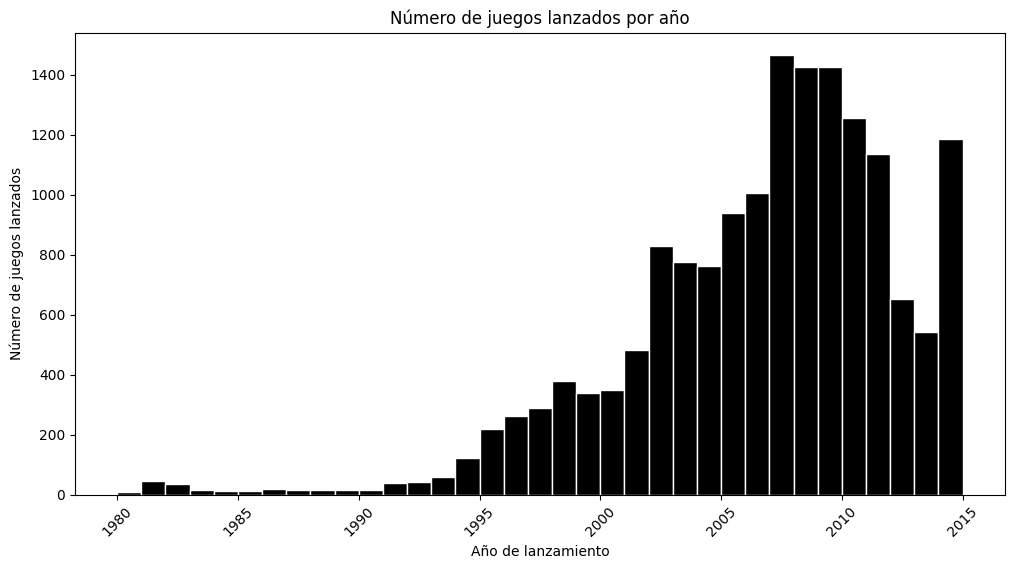

In [55]:
# Conteo de lanzamientos por año
year_counts = games['year_of_release']
plt.figure(figsize=(12,6))
plt.hist(year_counts,bins=range(int(year_counts.min()),int(year_counts.max()),+1),color="black",edgecolor="white")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Número de juegos lanzados")
plt.title("Número de juegos lanzados por año")
plt.xticks(rotation=45)
plt.show()


De acuerdo con los datos disponibles y considerando la posibilidad de que falten datos correspondientes al año 2016, podemos observar una clara tendencia en el aumento de la producción de nuevos juegos entre los años 2004 y 2010. Este período se caracteriza por un incremento notable en la diversidad de títulos, lo cual indica una expansión en el desarrollo y lanzamiento de videojuegos. Este fenómeno puede deberse a varios factores clave

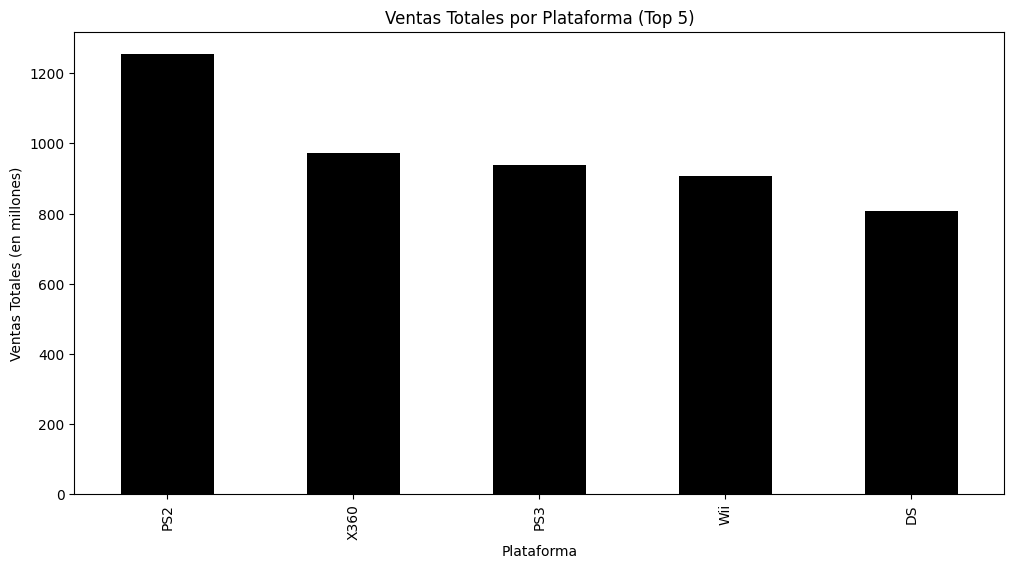

In [56]:
# Ventas totales por plataforma
platform_sales = games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().sum(axis=1)
top_platforms = platform_sales.nlargest(5)  # Seleccionamos las 5 plataformas más vendidas

# Gráfico de ventas totales por plataforma
top_platforms.plot(kind='bar', figsize=(12, 6),color=("black"))
plt.xlabel("Plataforma")
plt.ylabel("Ventas Totales (en millones)")
plt.title("Ventas Totales por Plataforma (Top 5)")
plt.show()


Al observar la tendencia de producción de juegos en la década de 2000 y relacionarla con los datos de la gráfica anterior, podemos inferir que la diversidad de títulos no fue el principal factor que impulsó las ventas de la PlayStation 2 (PS2) de Sony. Aunque la PS2 se lanzó en el año 2000 y tuvo un éxito comercial sin precedentes, las razones de su éxito parecen estar más vinculadas a otros factores estratégicos y tecnológicos en lugar de a la variedad de títulos disponibles
Podemos conjeturar que, en la década de 2000, la diversidad de títulos no fue un factor crucial para el éxito de Sony con la PS2. Más bien, Sony aprovechó una estrategia bien diseñada que incluía títulos exclusivos, compatibilidad con versiones anteriores, funciones multimedia y precios accesibles. Esto permitió a la PS2 dominar el mercado y establecer un precedente que beneficiaría a Sony en las generaciones de consolas posteriores.

Para futuras estrategias, Sony podría enfocarse en mantener un equilibrio entre la calidad de los títulos exclusivos y la diversidad de su catálogo, especialmente en un mercado actual donde la variedad de géneros y estilos de juego es cada vez más valorada por los consumidores.

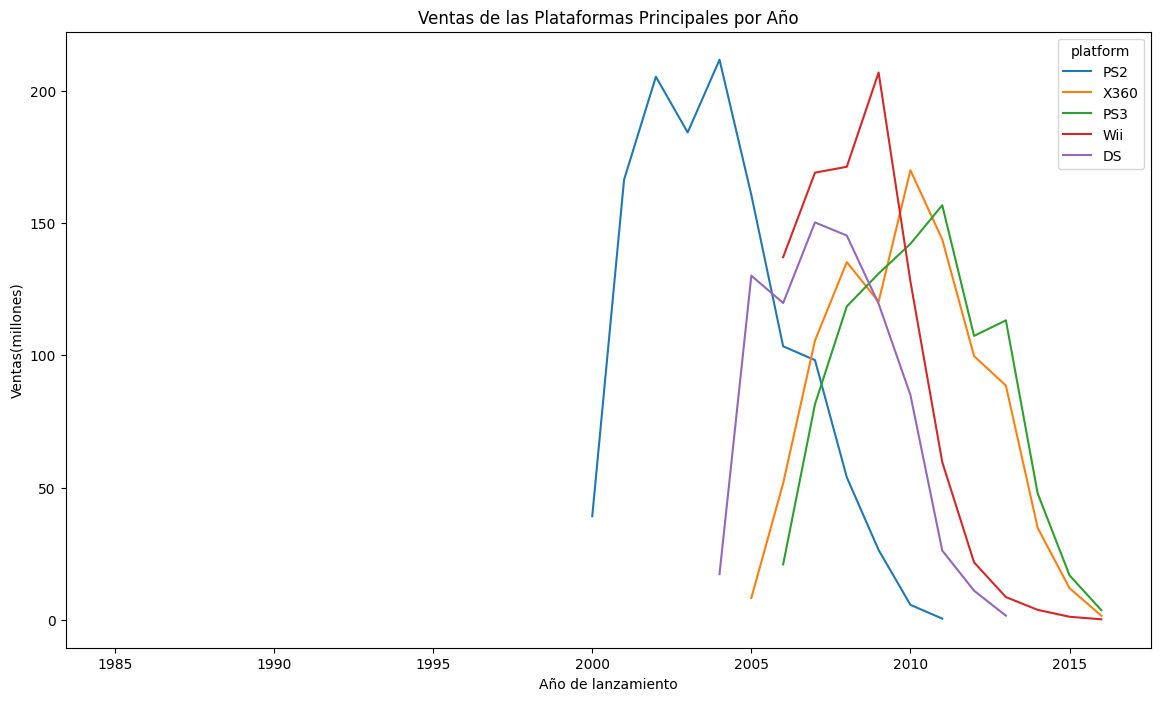

In [57]:
# Ventas por plataforma y año
platform_year_sales = games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Gráfica para las plataformas populares a lo largo del tiempo
platform_year_sales[top_platforms.index].plot(figsize=(14, 8))
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas(millones)")
plt.title("Ventas de las Plataformas Principales por Año")
plt.show()

La afirmación "la cantidad no es calidad" se confirma al observar cómo los años de mayor producción de nuevos títulos coinciden con el inicio de un declive en la curva de ventas. Esto sugiere que, aunque la cantidad de juegos en el mercado aumentó en esos años, este incremento no se tradujo en un mayor éxito comercial. En cambio, parece que otros factores, como la calidad de los juegos o la saturación del mercado, tuvieron un impacto más fuerte en las ventas.


In [58]:
# Filtramos solo los juegos lanzados a partir del 2000 tomando en cuenta que el mayor numero de ventas podemos atribuirlo al ps2
relevant_games = games[games['year_of_release'] >= 2000]

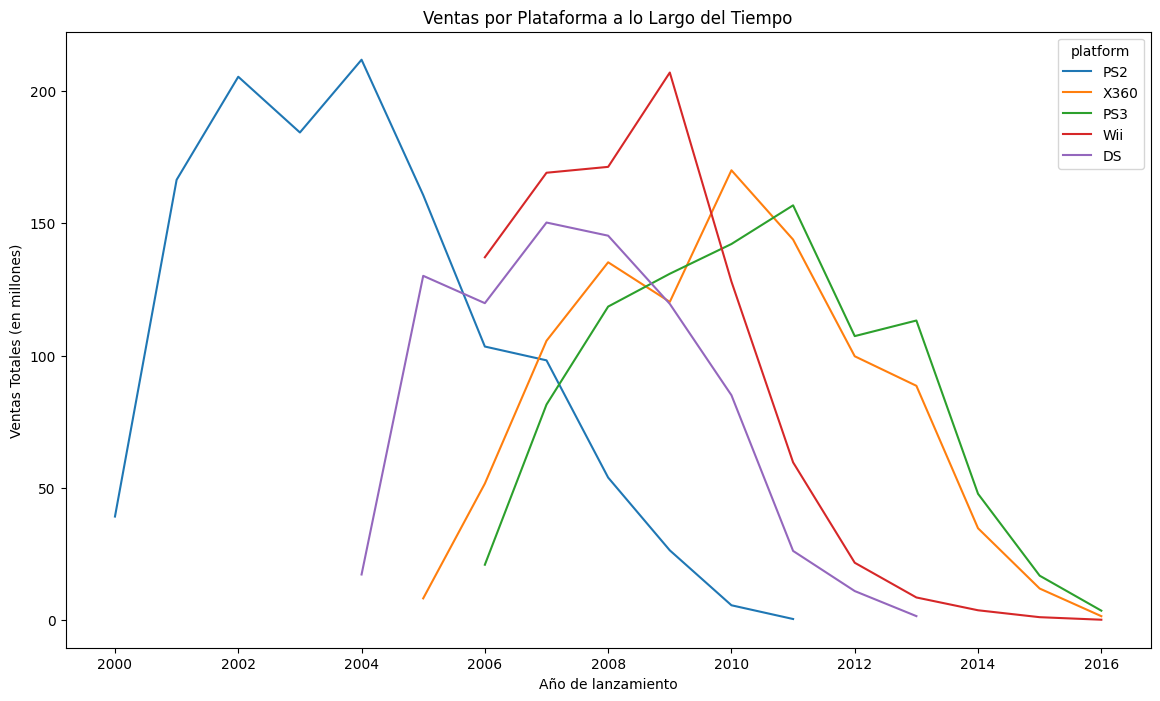

In [59]:
# Ventas por plataforma y año
platform_year_sales = relevant_games.groupby(['year_of_release', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().sum(axis=1)

# Unstack para reorganizar el DataFrame, de modo que cada plataforma sea una columna
platform_year_sales = platform_year_sales.unstack(level='platform')

# Gráfica para las plataformas más vendidas a lo largo del tiempo
platform_year_sales[top_platforms.index].plot(figsize=(14, 8))
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas Totales (en millones)")
plt.title("Ventas por Plataforma a lo Largo del Tiempo")
plt.show()

La caída en las ventas de la PS2 de Sony coincide significativamente con el lanzamiento de la Xbox 360 de Microsoft en 2005. En ese momento, la Xbox 360 llegó al mercado con avances tecnológicos notables, incluyendo gráficos de alta calidad, mejores capacidades en línea, y una arquitectura diseñada para juegos de mayor complejidad. Estos factores hicieron que muchos jugadores comenzaran a "actualizarse", optando por la nueva generación de consolas y reduciendo la popularidad de la PS2.

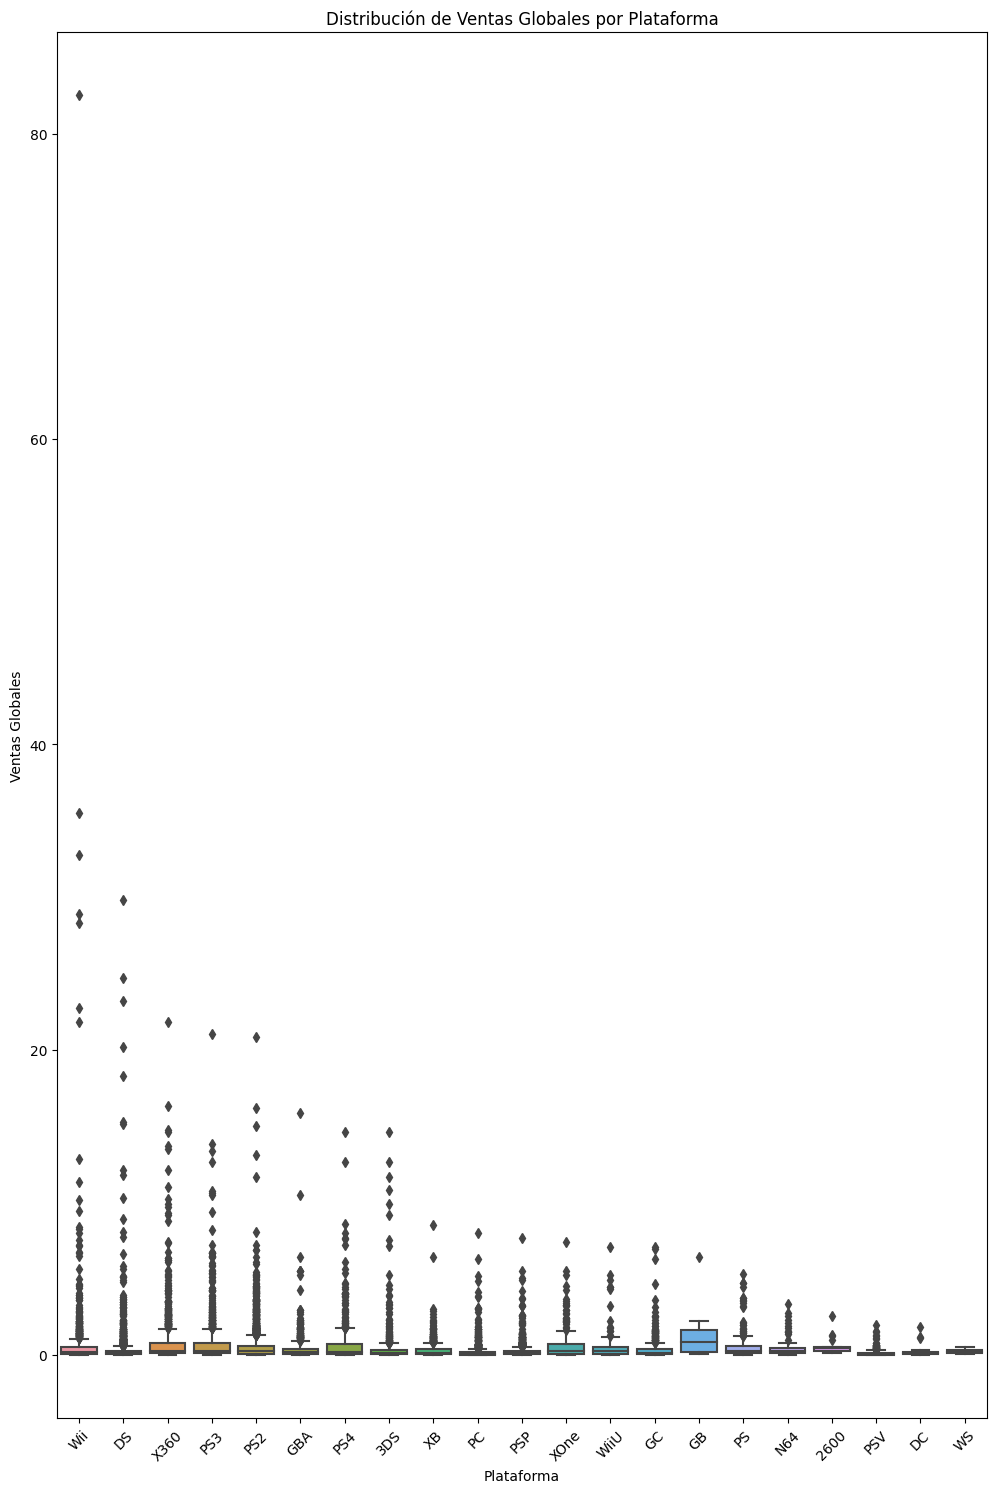

name                 Wii Sports
platform                    Wii
year_of_release          2006.0
genre                    Sports
na_sales                  41.36
eu_sales                  28.96
jp_sales                   3.77
other_sales                8.45
critic_score               76.0
user_score                  8.0
rating                        E
critic_score_null             0
total_sales               82.54
Name: 0, dtype: object


In [60]:
# Diagrama de caja de ventas globales por plataforma
plt.figure(figsize=(12, 18))
sns.boxplot(data=relevant_games, x='platform', y='total_sales')
plt.xlabel("Plataforma")
plt.ylabel("Ventas Globales")
plt.title("Distribución de Ventas Globales por Plataforma")
plt.xticks(rotation=45)
plt.show()
top_game=games.loc[games["total_sales"].idxmax()]
print(top_game)

Wii Sports se consolidó como uno de los mayores éxitos de la industria, con ventas cercanas a los 83 millones de copias en todo el mundo. Su éxito se debe a una combinación de factores clave que lo hicieron no solo popular, sino también accesible para una amplia variedad de jugadores, muchos de los cuales eran nuevos en el mundo de los videojuegos. Su diseño intuitivo, su atractivo social y la integración con el hardware de la Wii fueron factores determinantes para alcanzar esta cifra de ventas.

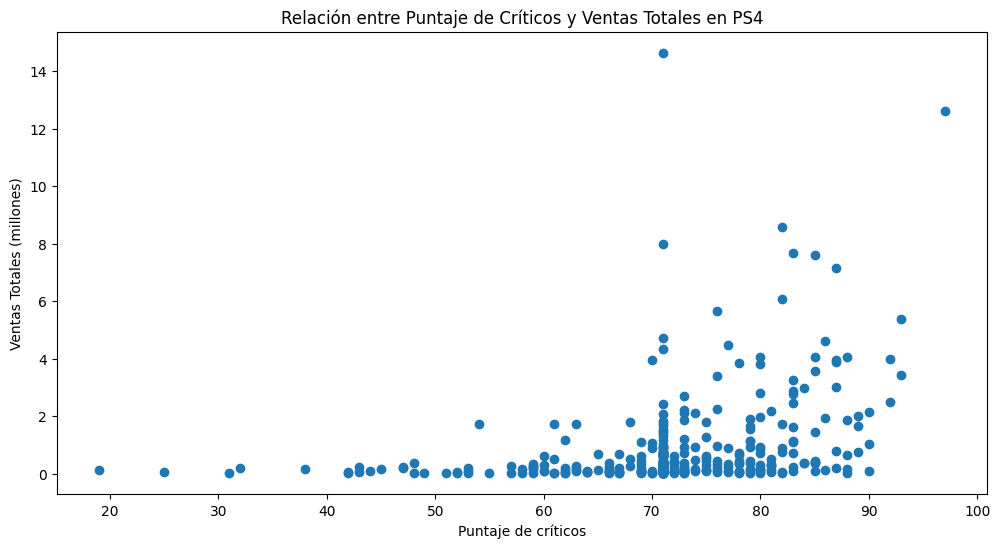

Correlación entre el puntaje de críticos y las ventas en PS4: 0.3387064530024634


In [61]:
# Filtramos los datos para una plataforma, como "PS4"
platform_data = relevant_games[relevant_games['platform'] == 'PS4']

# Gráfico de dispersión y correlación entre "critic_score" y ventas
plt.figure(figsize=(12, 6))
plt.scatter(platform_data['critic_score'], platform_data["total_sales"])
plt.xlabel("Puntaje de críticos")
plt.ylabel("Ventas Totales (millones)")
plt.title("Relación entre Puntaje de Críticos y Ventas Totales en PS4")
plt.show()

correlation_critic_sales = platform_data['critic_score'].corr(platform_data["total_sales"])
print("Correlación entre el puntaje de críticos y las ventas en PS4:", correlation_critic_sales)

Podemos observar una tendecia en incremento cuando las criticas son favorables para un titulo 

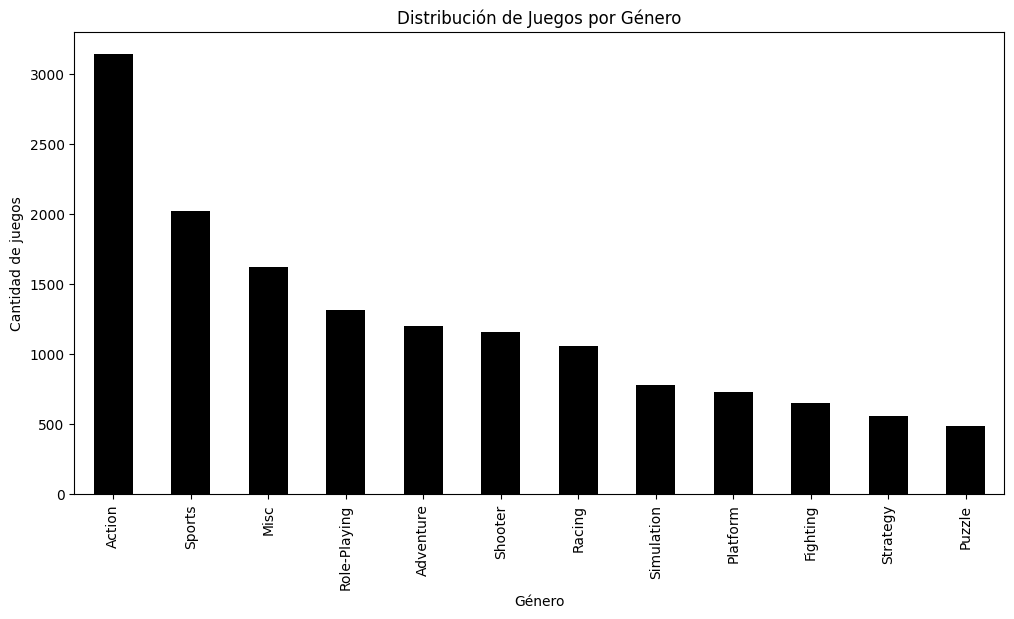

In [78]:
# Distribución de juegos por género
genre_counts = relevant_games['genre'].value_counts()
genre_counts.plot(kind='bar', figsize=(12, 6),color=("black"))
plt.xlabel("Género")
plt.ylabel("Cantidad de juegos")
plt.title("Distribución de Juegos por Género")
plt.show()


Es interesante observar cómo el éxito de Wii Sports y de otros juegos en los géneros de acción y deportes indica una preferencia del mercado por títulos que generan emociones intensas, como la tensión y la competitividad. Estos géneros, al ofrecer una experiencia inmersiva y dinámica, logran captar la atención del jugador al conectarlo emocionalmente con el desarrollo de la partida, lo cual contribuye a una mayor demanda y éxito comercial.

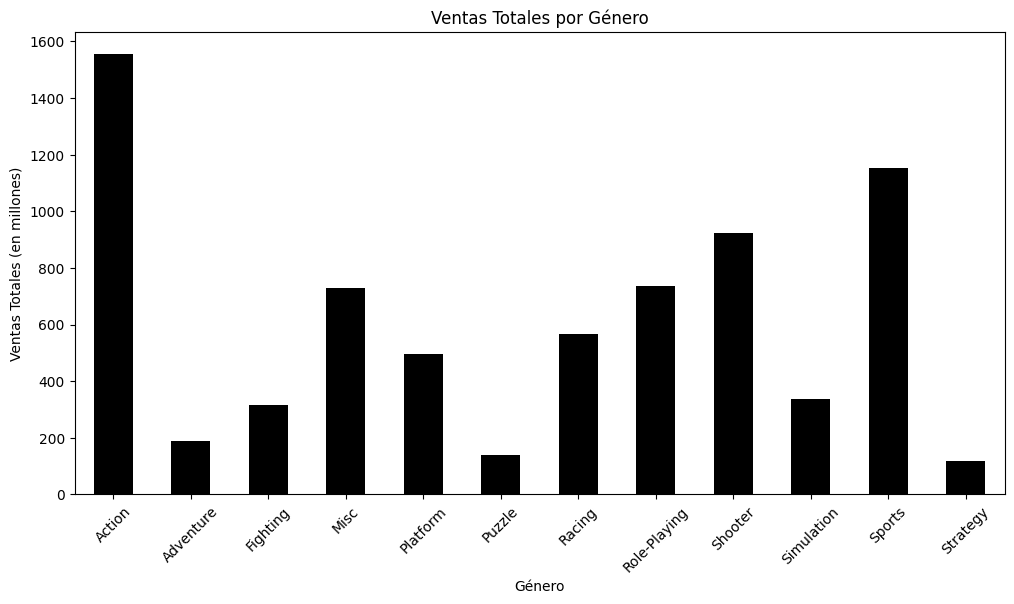

In [63]:
# Ventas totales por género
genre_sales = relevant_games.groupby('genre')["total_sales"].sum()
genre_sales.plot(kind='bar', figsize=(12, 6),color=("black"))
plt.xlabel("Género")
plt.ylabel("Ventas Totales (en millones)")
plt.title("Ventas Totales por Género")
plt.xticks(rotation=45)
plt.show()


In [64]:
# Cinco plataformas principales en cada región
top_platforms_na = relevant_games.groupby('platform')['na_sales'].sum().nlargest(5)
top_platforms_eu = relevant_games.groupby('platform')['eu_sales'].sum().nlargest(5)
top_platforms_jp = relevant_games.groupby('platform')['jp_sales'].sum().nlargest(5)

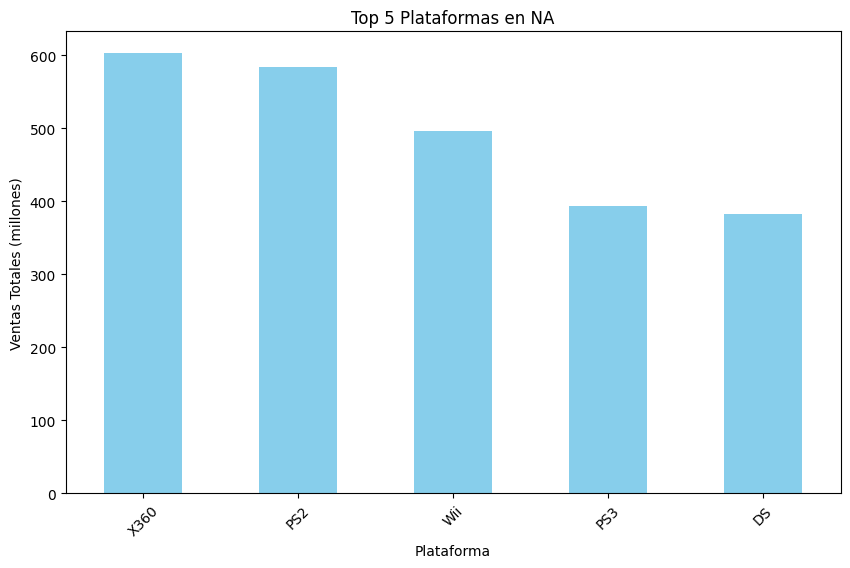

Principales plataformas en NA:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64


In [65]:
# Gráfica de las plataformas más populares en NA
plt.figure(figsize=(10, 6))
top_platforms_na.plot(kind='bar', color='skyblue')
plt.title("Top 5 Plataformas en NA")
plt.xlabel("Plataforma")
plt.ylabel("Ventas Totales (millones)")
plt.xticks(rotation=45)
plt.show()
print("Principales plataformas en NA:")
print(top_platforms_na)




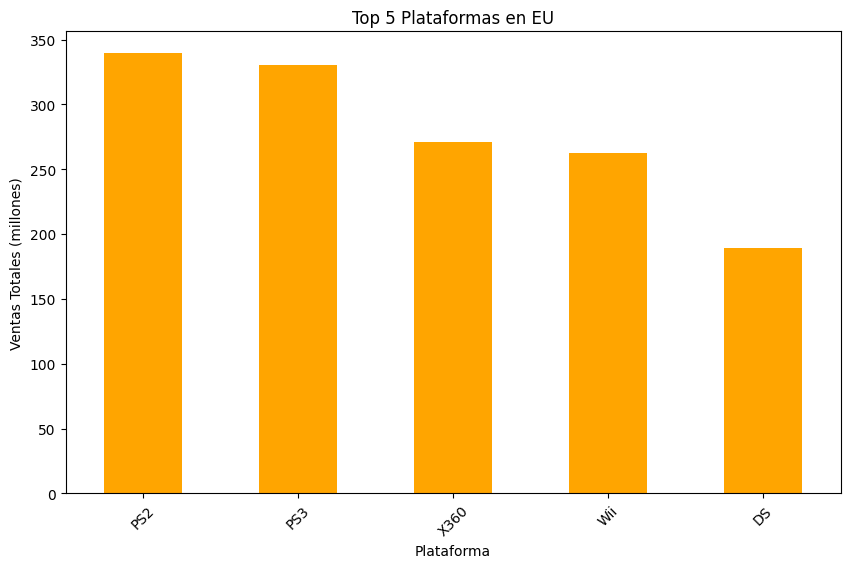


Principales plataformas en EU:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
DS      188.89
Name: eu_sales, dtype: float64


In [66]:
# Gráfica de las plataformas más populares en EU
plt.figure(figsize=(10, 6))
top_platforms_eu.plot(kind='bar', color='orange')
plt.title("Top 5 Plataformas en EU")
plt.xlabel("Plataforma")
plt.ylabel("Ventas Totales (millones)")
plt.xticks(rotation=45)
plt.show()
print("\nPrincipales plataformas en EU:")
print(top_platforms_eu)

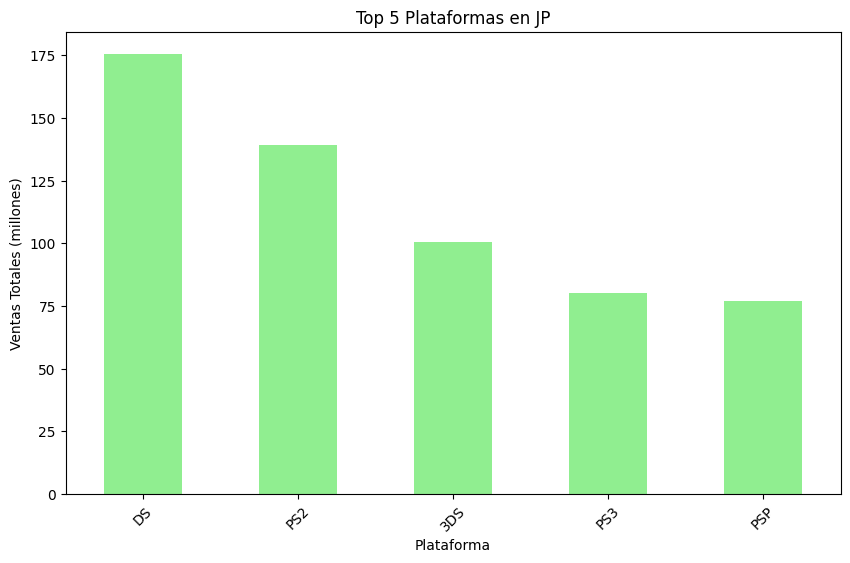


Principales plataformas en JP:
platform
DS     175.55
PS2    139.20
3DS    100.67
PS3     80.19
PSP     76.78
Name: jp_sales, dtype: float64


In [67]:

# Gráfica de las plataformas más populares en JP
plt.figure(figsize=(10, 6))
top_platforms_jp.plot(kind='bar', color='lightgreen')
plt.title("Top 5 Plataformas en JP")
plt.xlabel("Plataforma")
plt.ylabel("Ventas Totales (millones)")
plt.xticks(rotation=45)
plt.show()
print("\nPrincipales plataformas en JP:")
print(top_platforms_jp)

Podemos observar que la preferencia del mercado japonés por las consolas portátiles se debe a factores culturales y prácticos, mientras que en Europa y Norteamérica, la rivalidad entre Sony y Microsoft, junto con las estrategias de marketing y los títulos exclusivos, han influido en la inclinación hacia las consolas de sobremesa. La preferencia de los jugadores en cada región responde a sus estilos de vida y expectativas de juego, lo que ha llevado a que cada empresa adapte sus estrategias para satisfacer estas necesidades.

In [68]:
# Cinco géneros principales en cada región
top_genres_na = relevant_games.groupby('genre')['na_sales'].sum().nlargest(5)
top_genres_eu = relevant_games.groupby('genre')['eu_sales'].sum().nlargest(5)
top_genres_jp = relevant_games.groupby('genre')['jp_sales'].sum().nlargest(5)

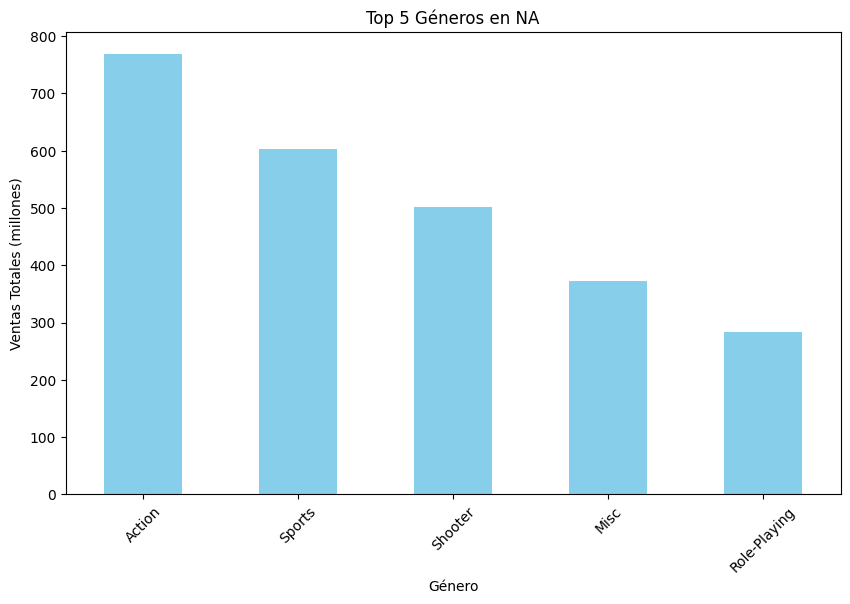

Principales géneros en NA:
genre
Action          768.11
Sports          602.62
Shooter         502.64
Misc            372.97
Role-Playing    283.07
Name: na_sales, dtype: float64


In [79]:
# Gráfica de los géneros más populares en NA
plt.figure(figsize=(10, 6))
top_genres_na.plot(kind='bar', color='skyblue')
plt.title("Top 5 Géneros en NA")
plt.xlabel("Género")
plt.ylabel("Ventas Totales (millones)")
plt.xticks(rotation=45)
plt.show()
print("Principales géneros en NA:")
print(top_genres_na)

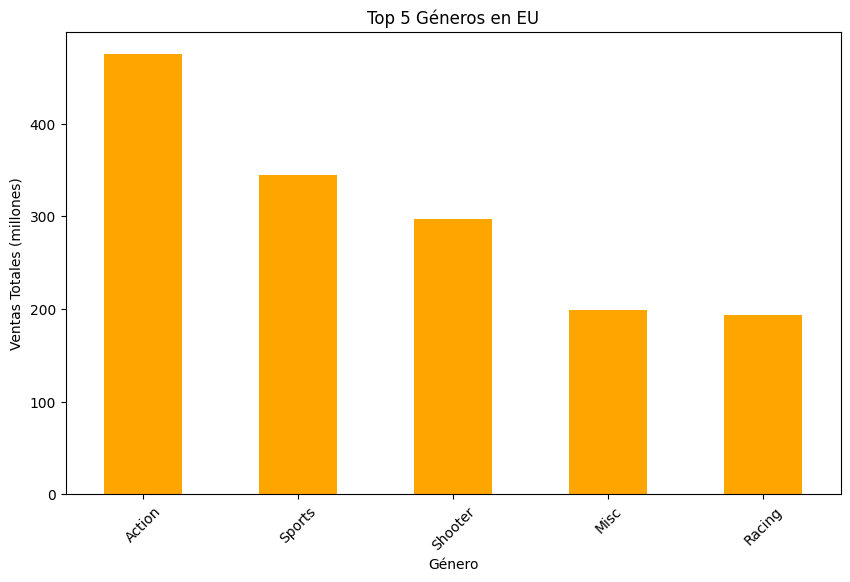


Principales géneros en EU:
genre
Action     474.72
Sports     345.04
Shooter    296.84
Misc       198.85
Racing     194.04
Name: eu_sales, dtype: float64


In [80]:
# Gráfica de los géneros más populares en EU
plt.figure(figsize=(10, 6))
top_genres_eu.plot(kind='bar', color='orange')
plt.title("Top 5 Géneros en EU")
plt.xlabel("Género")
plt.ylabel("Ventas Totales (millones)")
plt.xticks(rotation=45)
plt.show()
print("\nPrincipales géneros en EU:")
print(top_genres_eu)

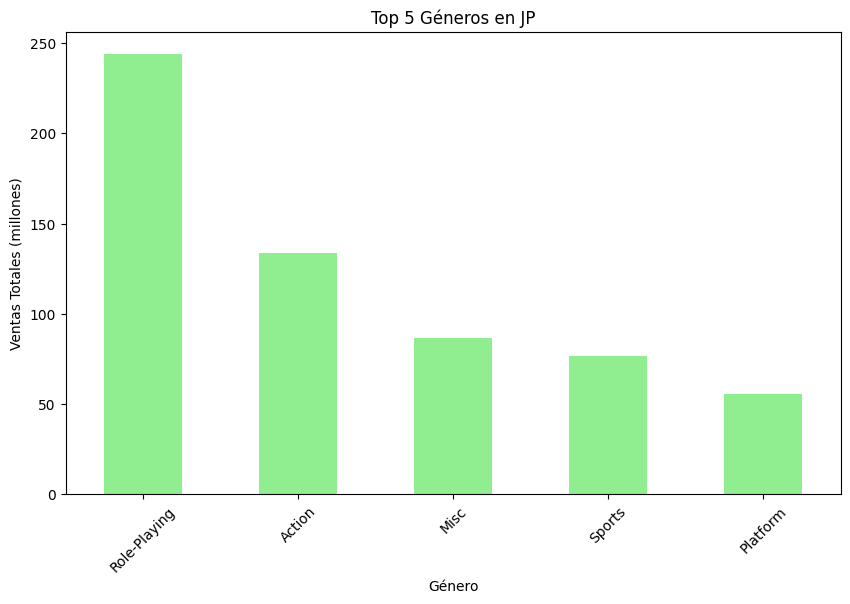


Principales géneros en JP:
genre
Role-Playing    243.73
Action          133.52
Misc             86.52
Sports           76.49
Platform         55.39
Name: jp_sales, dtype: float64


In [81]:
# Gráfica de los géneros más populares en JP
plt.figure(figsize=(10, 6))
top_genres_jp.plot(kind='bar', color='lightgreen')
plt.title("Top 5 Géneros en JP")
plt.xlabel("Género")
plt.ylabel("Ventas Totales (millones)")
plt.xticks(rotation=45)
plt.show()
print("\nPrincipales géneros en JP:")
print(top_genres_jp)

Podemos inferir que el éxito de los RPG en Japón se debe a una combinación de factores culturales y preferencias individuales, donde los jugadores valoran los mundos abiertos, la narrativa profunda y el desarrollo de personajes. Esta inclinación por los juegos de rol refleja cómo las empresas de videojuegos pueden adaptar sus estrategias a las necesidades de cada mercado, reconociendo que los jugadores en diferentes regiones buscan experiencias de juego que respondan a sus intereses y valores culturales

La preferencia japonesa por los RPG también se debe a una tradición de juegos que, desde sus inicios, fueron creados con un enfoque en la narrativa y la inmersión. Títulos clásicos como Chrono Trigger y The Legend of Zelda establecieron un precedente en la cultura de juegos en Japón, creando una expectativa de historias complejas y detalladas

En contraste, los mercados de Europa y Norteamérica tienden a preferir títulos de acción y aventura, donde la experiencia de juego está centrada en la dinámica y la adrenalina. 

In [72]:
esrb_sales_na = relevant_games.groupby('rating')['na_sales'].sum()
esrb_sales_eu = relevant_games.groupby('rating')['eu_sales'].sum()
esrb_sales_jp = relevant_games.groupby('rating')['jp_sales'].sum()

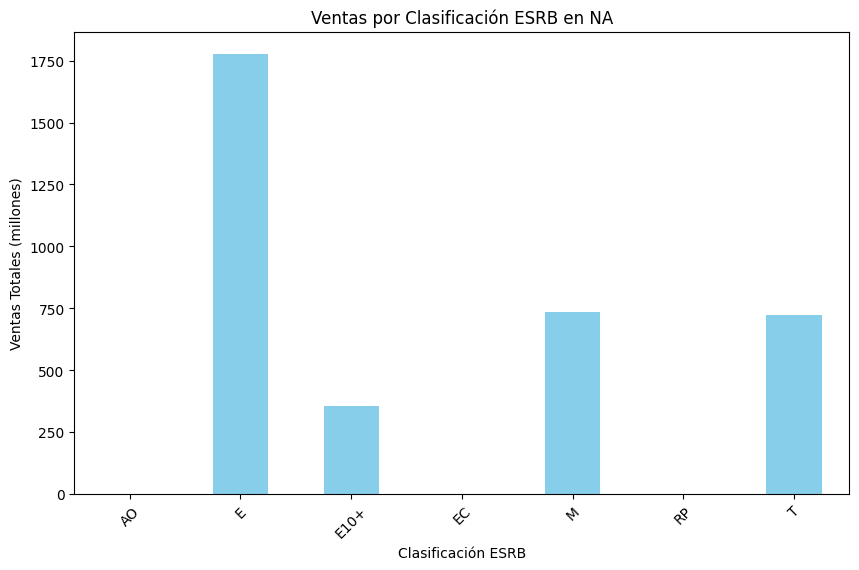

Ventas por clasificación ESRB en NA:
rating
AO         1.26
E       1777.25
E10+     353.32
EC         1.53
M        733.39
RP         0.00
T        722.01
Name: na_sales, dtype: float64


In [82]:
# Gráfica de ventas por clasificación ESRB en NA
plt.figure(figsize=(10, 6))
esrb_sales_na.plot(kind='bar', color='skyblue')
plt.title("Ventas por Clasificación ESRB en NA")
plt.xlabel("Clasificación ESRB")
plt.ylabel("Ventas Totales (millones)")
plt.xticks(rotation=45)
plt.show()
print("Ventas por clasificación ESRB en NA:")
print(esrb_sales_na)

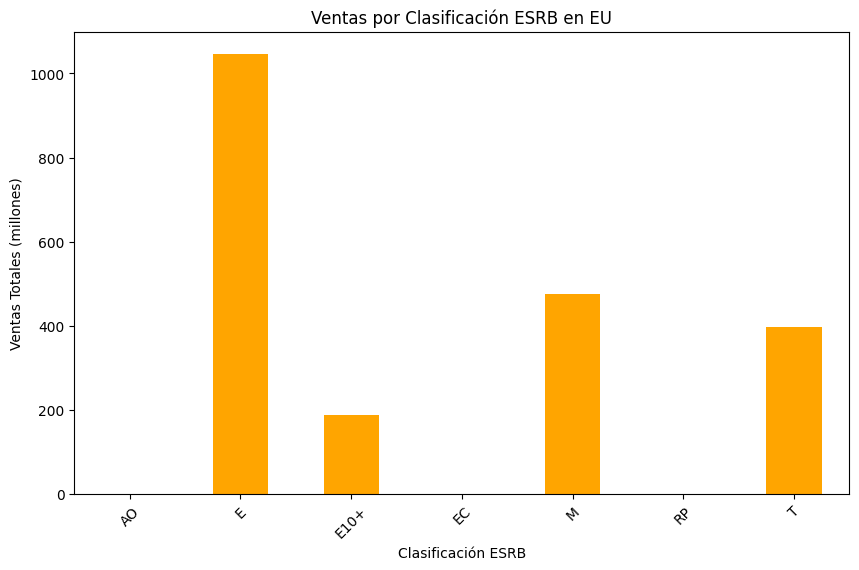


Ventas por clasificación ESRB en EU:
rating
AO         0.61
E       1046.45
E10+     188.50
EC         0.11
M        476.37
RP         0.08
T        397.95
Name: eu_sales, dtype: float64


In [83]:
# Gráfica de ventas por clasificación ESRB en EU
plt.figure(figsize=(10, 6))
esrb_sales_eu.plot(kind='bar', color='orange')
plt.title("Ventas por Clasificación ESRB en EU")
plt.xlabel("Clasificación ESRB")
plt.ylabel("Ventas Totales (millones)")
plt.xticks(rotation=45)
plt.show()
print("\nVentas por clasificación ESRB en EU:")
print(esrb_sales_eu)

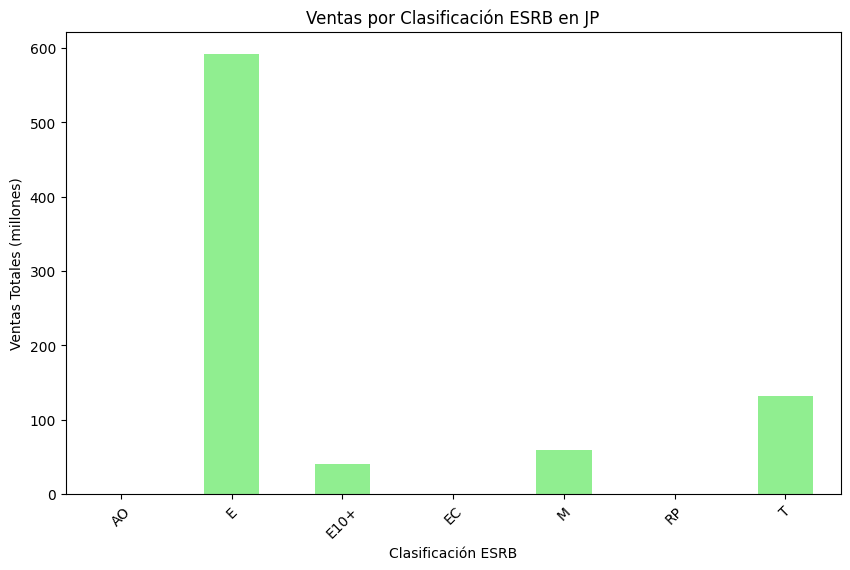


Ventas por clasificación ESRB en JP:
rating
AO        0.00
E       592.11
E10+     40.20
EC        0.00
M        58.50
RP        0.00
T       131.71
Name: jp_sales, dtype: float64


In [84]:
# Gráfica de ventas por clasificación ESRB en JP
plt.figure(figsize=(10, 6))
esrb_sales_jp.plot(kind='bar', color='lightgreen')
plt.title("Ventas por Clasificación ESRB en JP")
plt.xlabel("Clasificación ESRB")
plt.ylabel("Ventas Totales (millones)")
plt.xticks(rotation=45)
plt.show()
print("\nVentas por clasificación ESRB en JP:")
print(esrb_sales_jp)

Podemos inferir que los titulos no estan estrictamente relacinnados a su clasidficacion para tener un mayo exito 

1. Hipótesis para las calificaciones de usuarios en plataformas Xbox One y PC

Formulación de hipótesis

Hipótesis nula : Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales. Esto significa que cualquier diferencia entre las medias es puramente por azar.

Hipótesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes. Esto implica que la diferencia entre las medias es estadísticamente significativa.


 prueba t de dos muestras independientes para comparar las medias de calificación de usuarios entre Xbox One y PC.La prueba t es adecuada cuando se comparan las medias de dos grupos independientes y tenemos datos numéricos que se distribuyen normalmente 
Definiremos alpha = 0.05, un valor común en las pruebas de hipótesis. Si el valor p obtenido en la prueba es menor que 0.05, rechazaremos la hipótesis nula.

In [76]:
# Filtrar los datos para obtener las calificaciones de usuario para Xbox One y PC
xbox_ratings = relevant_games[(relevant_games['platform'] == 'XOne') & (relevant_games['user_score'].notna())]['user_score'].astype(float)
pc_ratings = relevant_games[(relevant_games['platform'] == 'PC') & (relevant_games['user_score'].notna())]['user_score'].astype(float)
# Realizar la prueba t de dos muestras independientes
t_stat, p_value = stats.ttest_ind(xbox_ratings, pc_ratings, equal_var=False)

# Resultados
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Evaluar el valor p
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC son significativamente diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: no hay evidencia suficiente de que las calificaciones promedio de los usuarios para Xbox One y PC sean diferentes.")

Estadístico t: -3.7530899422867607
Valor p: 0.0001996417378985732
Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC son significativamente diferentes.


2. Hipótesis para las calificaciones de usuarios en géneros de Acción y Deportes



Hipótesis nula : Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

Hipótesis alternativa : Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

nuevamente una prueba t de dos muestras independientes para comparar las calificaciones entre los géneros de Acción y Deportes, ya que estamos comparando las medias de dos grupos independientes


In [77]:
# Filtrar los datos para obtener las calificaciones de usuario para géneros Acción y Deportes
action_ratings = relevant_games[(relevant_games['genre'] == 'Action') & (relevant_games['user_score'].notna())]['user_score'].astype(float)
sports_ratings = relevant_games[(relevant_games['genre'] == 'Sports') & (relevant_games['user_score'].notna())]['user_score'].astype(float)

# Realizar la prueba t de dos muestras independientes
t_stat, p_value = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)

# Resultados
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Evaluar el valor p
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para los géneros Acción y Deportes son significativamente diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: no hay evidencia suficiente de que las calificaciones promedio de los usuarios para los géneros Acción y Deportes sean diferentes.")


Estadístico t: 0.9158362313114309
Valor p: 0.35980795341316496
No podemos rechazar la hipótesis nula: no hay evidencia suficiente de que las calificaciones promedio de los usuarios para los géneros Acción y Deportes sean diferentes.


En base a las pruebas de hipótesis realizadas para comparar las calificaciones de usuarios en distintas plataformas y géneros, obtenemos las siguientes conclusiones:

Comparación entre plataformas Xbox One y PC: La prueba t para las calificaciones promedio de los usuarios en las plataformas Xbox One y PC revela una diferencia significativa. El valor p obtenido fue de 0.0002, que es menor al nivel de significancia de 0.05. Esto indica que podemos rechazar la hipótesis nula y concluir que las calificaciones promedio de los usuarios en Xbox One y PC son estadísticamente diferentes. Este resultado sugiere que los usuarios de estas plataformas tienen opiniones significativamente distintas respecto a los juegos, lo que podría estar relacionado con diferencias en la experiencia de usuario, características de las plataformas o la variedad de juegos disponibles en cada una.

Comparación entre géneros de Acción y Deportes: Al comparar las calificaciones promedio de los usuarios para los géneros de Acción y Deportes, el valor p obtenido fue de 0.36, que es superior al nivel de significancia de 0.05. Esto nos lleva a no rechazar la hipótesis nula, lo que implica que no hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes sean diferentes. Este resultado sugiere que, en términos generales, los usuarios otorgan calificaciones similares a estos géneros, lo que podría indicar que las preferencias entre estos géneros son más equilibradas o que factores como la jugabilidad o las mecánicas no influyen significativamente en la calificación de ambos géneros.

Reflexión :
La diferencia significativa en las calificaciones entre plataformas Xbox One y PC podría ser un indicador importante para las estrategias de marketing y el desarrollo de juegos, ya que resalta una posible variabilidad en la experiencia de usuario que podría ser aprovechada por los desarrolladores.
La falta de diferencias claras en las calificaciones entre los géneros de Acción y Deportes sugiere que, si bien los jugadores pueden tener preferencias personales, estos géneros no parecen generar una disparidad significativa en la satisfacción general de los usuarios. Esto podría ser útil para los estudios que consideran cómo enfocar el desarrollo o la promoción de juegos dentro de estos géneros.

Preferencias Regionales y Tecnológicas: Además, se ha destacado la importancia de los factores culturales y tecnológicos en la elección de plataformas y géneros por parte de los jugadores. La preferencia por consolas portátiles en Japón, como la "DS", resalta la importancia de la movilidad en ese mercado, mientras que en Europa y Norteamérica, la rivalidad histórica entre Sony y Microsoft y el cambio generacional con la Xbox 360 parecen haber influido en las decisiones de compra y en las calificaciones. Asimismo, el éxito de juegos como Wii Sports demuestra cómo la simplicidad y la interacción social pueden ser factores determinantes en la elección de títulos, más allá de los gráficos o la complejidad.

Impacto de la Diversidad de Títulos en las Ventas: Finalmente, el análisis de la producción de títulos a lo largo de las décadas muestra cómo la cantidad de juegos no necesariamente correlaciona con el éxito de una plataforma. La aparición de consolas como la Xbox 360, que incorporaron nuevas tecnologías y mejoraron la calidad gráfica, marcó un cambio significativo en las preferencias de los usuarios, afectando las ventas y el interés por plataformas anteriores como la PS2.

En resumen, los datos proporcionan una visión más clara sobre cómo las preferencias de los jugadores, las plataformas tecnológicas y las estrategias de marketing influyen en las calificaciones y el éxito de los videojuegos. Los resultados sugieren que las diferencias en las plataformas, junto con los factores de experiencia del usuario y las características de los géneros, juegan un papel esencial en la forma en que los jugadores valoran los títulos, lo que debe ser considerado por los desarrolladores y equipos de marketing al tomar decisiones sobre futuros lanzamientos y campañas promocionales.